In [1]:
import sqlite3

# Create a SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Drop the table if it exists
cursor.execute("DROP TABLE IF EXISTS sales")

# Create the table
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert some data
sales_data = [
    ("2025-06-01", "Apple", 10, 1.2),
    ("2025-06-01", "Banana", 5, 0.5),
    ("2025-06-02", "Apple", 7, 1.2),
    ("2025-06-02", "Orange", 8, 0.8),
    ("2025-06-03", "Banana", 10, 0.5),
    ("2025-06-03", "Apple", 6, 1.2),
    ("2025-06-04", "Orange", 12, 0.8),
    ("2025-06-04", "Apple", 4, 1.2)
]

cursor.executemany("INSERT INTO sales (date, product, quantity, price) VALUES (?, ?, ?, ?)", sales_data)

conn.commit()
conn.close()

print("✅ Database created as 'sales_data.db'")


✅ Database created as 'sales_data.db'


In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("sales_data.db")

# Read sales table
df = pd.read_sql_query("SELECT * FROM sales", conn)
conn.close()
df


,id,date,product,quantity,price
0,1,2025-06-01,Apple,10,1.2
1,2,2025-06-01,Banana,5,0.5
2,3,2025-06-02,Apple,7,1.2
3,4,2025-06-02,Orange,8,0.8
4,5,2025-06-03,Banana,10,0.5
5,6,2025-06-03,Apple,6,1.2
6,7,2025-06-04,Orange,12,0.8
7,8,2025-06-04,Apple,4,1.2


In [3]:
# Total quantity sold
total_qty = df['quantity'].sum()

# Total revenue = quantity * price (row-wise)
df['revenue'] = df['quantity'] * df['price']
total_revenue = df['revenue'].sum()

print(f"📦 Total Quantity Sold: {total_qty}")
print(f"💰 Total Revenue: ₹{total_revenue:.2f}")


📦 Total Quantity Sold: 62
💰 Total Revenue: ₹55.90


In [4]:
# Group by product for quantity and revenue
product_summary = df.groupby('product').agg({
    'quantity': 'sum',
    'revenue': 'sum'
}).reset_index()

product_summary


,product,quantity,revenue
0,Apple,27,32.4
1,Banana,15,7.5
2,Orange,20,16.0


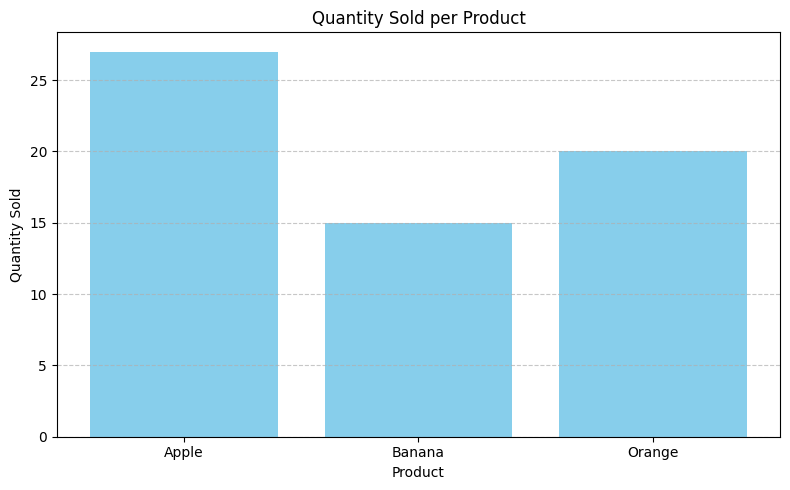

In [6]:
import matplotlib.pyplot as plt

# Bar chart: Quantity sold per product
plt.figure(figsize=(8, 5))
plt.bar(product_summary['product'], product_summary['quantity'], color='skyblue')
plt.title('Quantity Sold per Product')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
